In [1]:
# loading the IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
# keep the top 10000 most frequently occurring words in the train
# num_words=10000

In [3]:
# turning data to tensors
# option 1: trun them into an integer tensor of shape (samples, word_indices), first layer of the model becomes embedding layer
# option 2: one-hot encode

In [4]:
import numpy as np


def vectorize_sequences(sequences, demension=10000):
    results = np.zeros((len(sequences), demension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# vectorize labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# how much layers to use
# how many hidden units to choose for each layer

# sigmoid activation: output a probaility (a score berween 0 and 1)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-07-20 06:18:47.475322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-20 06:18:47.478093: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
# choose a loss function and an optimizer

# Because you are facing a binary classification problem and the output of your network is a probability
# it's best to use binary crossentropy loss

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [10]:
# In order to monitor during training the accuracy of the model on data it has never seen before,
# you'll create a validation set by setting apart 10000 samples from the original training data.

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5145 - accuracy: 0.7835 - val_loss: 0.3976 - val_accuracy: 0.8673
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3208 - accuracy: 0.9022 - val_loss: 0.3369 - val_accuracy: 0.8707
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2365 - accuracy: 0.9263 - val_loss: 0.3059 - val_accuracy: 0.8761
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1886 - accuracy: 0.9392 - val_loss: 0.2893 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1521 - accuracy: 0.9529 - val_loss: 0.2862 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1290 - accuracy: 0.9615 - val_loss: 0.2898 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1077 - accuracy: 0.9684 - val_loss: 0.3094 - val_accuracy: 0.8808
Epoch 8/20
30

In [13]:
# Note that the call to model.fit() returns a History object.
# This object has a member history
# which is a dictionary containing data about everything
# that happened during training.

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

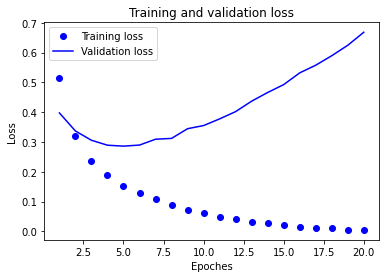

In [15]:
import matplotlib.pyplot as plt


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoches = range(1, len(loss_values) + 1)
plt.plot(epoches, loss_values, 'bo', label='Training loss')
plt.plot(epoches, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

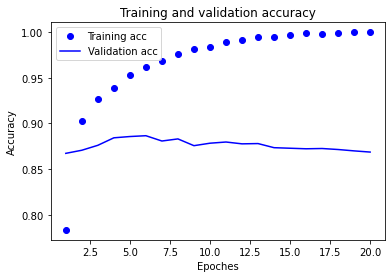

In [16]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epoches, acc_values, 'bo', label='Training acc')
plt.plot(epoches, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# overfitting
# retraining with less epoches

In [20]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0638 - accuracy: 0.9804
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0516 - accuracy: 0.9850
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0390 - accuracy: 0.9897
Epoch 4/4
782/782 [==============================] - 7s 9ms/step - loss: 0.6546 - accuracy: 0.8553


In [21]:
results

[0.6546387076377869, 0.8553199768066406]

In [22]:
# use it

model.predict(x_test)

782/782 [==============================] - 5s 6ms/step


array([[0.01516154],
       [1.        ],
       [0.9999485 ],
       ...,
       [0.04392422],
       [0.03326931],
       [0.99002117]], dtype=float32)